## Covid-19 analysis
by Bantarawan Chinchai 6338124021 & Tanakit Thangjantaraprapab 6338093221

In [ ]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2021-10-14 03:29:18--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 164.115.75.59
Connecting to data.go.th (data.go.th)|164.115.75.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195701830 (187M) [text/csv]
Saving to: ‘confirmed-cases-since-120864.csv’

confirmed-cases-sin 100%[===================>] 186.64M  1.32MB/s    in 3m 2s   

2021-10-14 03:32:21 (1.03 MB/s) - ‘confirmed-cases-since-120864.csv’ saved [195701830/195701830]



## Qeustion 1 : Working around the age

Does the age significant to the number of Covid-19 infection?
Seperate the age gap into 7 generation and find the total number of confirmed cases in each day by using groupby() function. Show the graph using plotly.express below.


In [ ]:
import pandas as pd 

df=pd.read_csv('confirmed-cases-since-120864.csv')
df['announce_date'] = pd.to_datetime(df['announce_date'], dayfirst = True)
df = df.fillna(0)

def data_each_province(name):
  data = []
  for ind in df.index:
    for i in range(len(name)):
      if df['province_of_isolation'][ind] == name[i]: 
        dateStr = df['announce_date'][ind].strftime("%d %b %Y ")
        gen = ''
        if df['age'][ind] <= 8:
          gen = 'alpha'
        if 9 <= df['age'][ind] <= 24:
          gen = 'genZ'
        if 25 <= df['age'][ind] <= 40:
          gen = 'Millennials'
        if 41 <= df['age'][ind] <= 56:
          gen = 'genX'
        if 57 <= df['age'][ind] <= 75:
          gen = 'Baby Boomers'
        if 76 <= df['age'][ind] <= 93:
          gen = 'Post war'
        if 94 <= df['age'][ind]:
          gen = 'WWII'
        data.append((dateStr, df['province_of_isolation'][ind], df['age'][ind], gen))
  new_data = pd.DataFrame(data, columns=['date','province','age', 'gen'])
  new_data.to_csv('file.csv')
  print(new_data[:10])

data_each_province(['กรุงเทพมหานคร'])

           date       province   age           gen
0  12 Aug 2021   กรุงเทพมหานคร   6.0         alpha
1  12 Aug 2021   กรุงเทพมหานคร  15.0          genZ
2  12 Aug 2021   กรุงเทพมหานคร  53.0          genX
3  12 Aug 2021   กรุงเทพมหานคร  44.0          genX
4  12 Aug 2021   กรุงเทพมหานคร  71.0  Baby Boomers
5  12 Aug 2021   กรุงเทพมหานคร  40.0   Millennials
6  12 Aug 2021   กรุงเทพมหานคร  63.0  Baby Boomers
7  12 Aug 2021   กรุงเทพมหานคร  39.0   Millennials
8  12 Aug 2021   กรุงเทพมหานคร  82.0      Post war
9  12 Aug 2021   กรุงเทพมหานคร  91.0      Post war


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

dt = pd.read_csv('file.csv')

group_data = dt.groupby(['gen', 'date']).size().reset_index()
group_data

symbols = ['circle', 'diamond', 'square', 'x', 'cross', 'hourglass', 'triangle-up']
colors = ['green', 'purple', 'orange', 'red', 'yellow', 'blue', 'brown']
fig = px.scatter(group_data, x='date', y=0, symbol= 'gen', color = 'gen', labels={
                     "date": "Date",
                     '0' : 'Total number',
                     "gen": "Genertion"
                 }, title="Age generation tend of Bangkok city", symbol_sequence = symbols, color_discrete_sequence = colors)
fig.show()

## Question 2 : Risk percentage
 Creating the table that contain percentage of the risk in each day of different province

In [ ]:
import pandas as pd

data = pd.read_csv('confirmed-cases-since-120864.csv')
data['announce_date'] = pd.to_datetime(data['announce_date'], dayfirst=True)

table = data.groupby(['announce_date', 'province_of_isolation', 'risk']).size().reset_index(name='counts')
totalcase = data.groupby(['announce_date', 'province_of_isolation']).size().reset_index(name='total')

percentage = pd.DataFrame()

for i in range(len(totalcase.total)):
  province = totalcase['province_of_isolation'][i]
  date = totalcase['announce_date'][i]
  temp_data = table[(table['province_of_isolation'] == province) & (table['announce_date'] == date)]['counts']
  df = temp_data / totalcase['total'][i]
  temp = pd.DataFrame(df)
  percentage = percentage.append(temp)
table['percentage'] = percentage

In [ ]:
table

,announce_date,province_of_isolation,risk,counts,percentage
0,2021-08-12,กระบี่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,26,0.742857
1,2021-08-12,กระบี่,อยู่ระหว่างการสอบสวน,5,0.142857
2,2021-08-12,กระบี่,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,4,0.114286
3,2021-08-12,กรุงเทพมหานคร,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,576,0.118616
4,2021-08-12,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,53,0.010914
...,...,...,...,...,...
14486,2021-10-10,เลย,อื่นๆ,14,1.000000
14487,2021-10-10,แพร่,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,3,0.375000
14488,2021-10-10,แพร่,อื่นๆ,5,0.625000
14489,2021-10-10,แม่ฮ่องสอน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,5,0.125000


In [ ]:
totalcase

,announce_date,province_of_isolation,total
0,2021-08-12,กระบี่,35
1,2021-08-12,กรุงเทพมหานคร,4856
2,2021-08-12,กาญจนบุรี,236
3,2021-08-12,กาฬสินธุ์,151
4,2021-08-12,กำแพงเพชร,73
...,...,...,...
4572,2021-10-10,เพชรบุรี,103
4573,2021-10-10,เพชรบูรณ์,67
4574,2021-10-10,เลย,14
4575,2021-10-10,แพร่,8


In [ ]:
# download font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

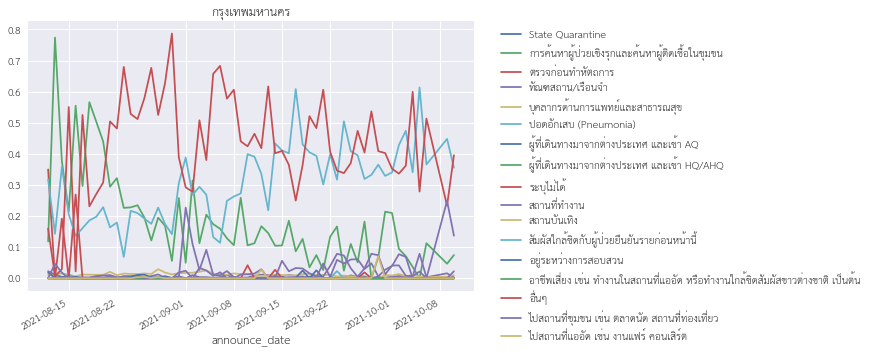

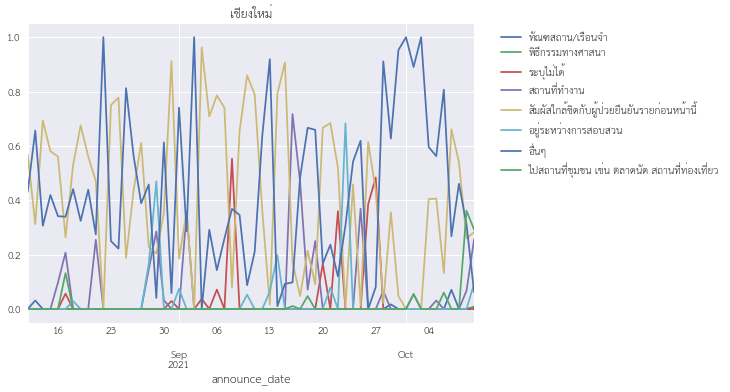

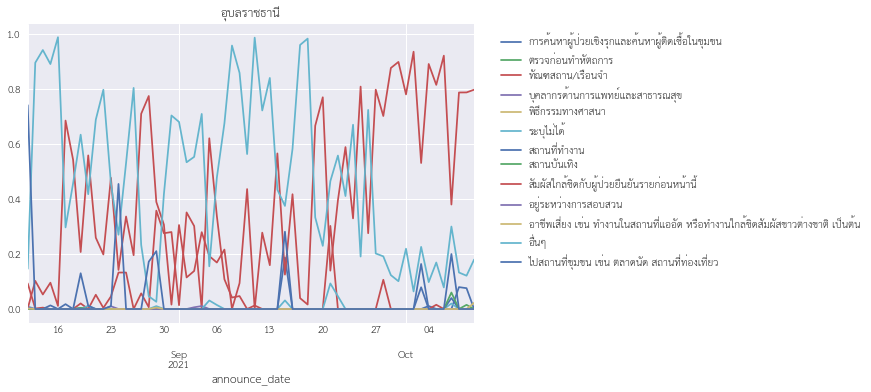

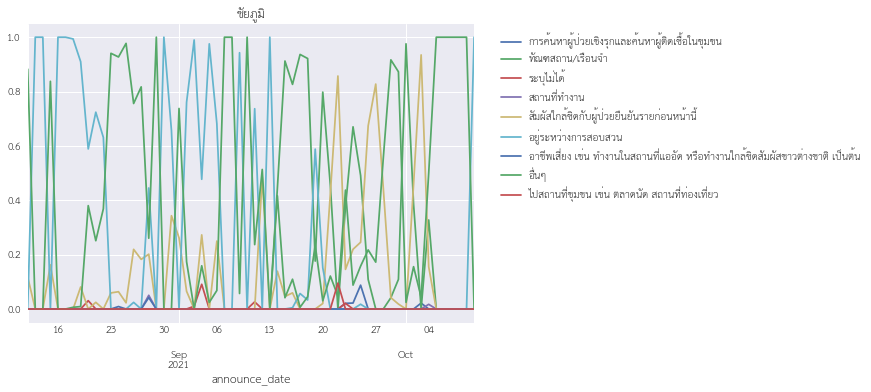

In [ ]:
# plotgraph
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

selected_province = ['กรุงเทพมหานคร', 'เชียงใหม่', 'อุบลราชธานี', 'ชัยภูมิ']

for i in selected_province:
  gp = table[(table['province_of_isolation'] == i)]
  table_data = gp.pivot(index = 'announce_date', columns = 'risk', values = 'percentage')
  table_data = table_data.fillna(0)
  table_data.plot()
  plt.legend(bbox_to_anchor = (1.04, 1.0))
  plt.title(i)
  plt.show()


## Question 3.
 By using the table from Question 2. Compare the risk of each province and find the most similar one using cosine similarity


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

province = list()
for i in table['province_of_isolation']:
  province.append(i)
province = list(set(province))
province.sort()

risk = list()
for i in table['risk']:
  risk.append(i)
risk = list(set(risk))
risk.sort()

matrix_sim = np.zeros((len(province), len(province)))

for i in range(32):
  sim = pd.DataFrame(index=province, columns=risk)
  sim.fillna(0.0, inplace=True)

  temp_sim = table[(table['announce_date'] == totalcase['announce_date'][i])]
  tt = temp_sim.pivot(index = 'province_of_isolation', columns = 'risk', values = 'percentage')
  tt.fillna(0, inplace=True)
  
  for r in risk:
    for p in province:
      try:
        sim[r][p] = tt[r][p]
      except:
        sim[r][p] = 0
  temp_matrix_sim = cosine_similarity(sim,sim)
  matrix_sim += temp_matrix_sim
matrix_sim = (matrix_sim / 32)
matrix_sim = matrix_sim.round(decimals = 10)
matrix_sim

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.60798095, ..., 0.18672842, 0.20626659,
        0.        ],
       [0.        , 0.60798095, 1.        , ..., 0.03605985, 0.43492801,
        0.31051534],
       ...,
       [0.        , 0.18672842, 0.03605985, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.20626659, 0.43492801, ..., 0.        , 1.        ,
        0.97717636],
       [0.        , 0.        , 0.31051534, ..., 0.        , 0.97717636,
        1.        ]])

In [ ]:
# Example of the table to use cosine similarity
tt

risk,Sandbox,State Quarantine,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,คนไทยเดินทางกลับจากต่างประเทศ,ตรวจก่อนทำหัตถการ,ทัณฑสถาน/เรือนจำ,บุคลากรด้านการแพทย์และสาธารณสุข,ปอดอักเสบ (Pneumonia),ผู้ที่เดินทางมาจากต่างประเทศ และเข้า AQ,ระบุไม่ได้,สถานที่ทำงาน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อยู่ระหว่างการสอบสวน,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงานใกล้ชิดสัมผัสชาวต่างชาติ เป็นต้น,อื่นๆ,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต
province_of_isolation,,,,,,,,,,,,,,,,,
กระบี่,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.742857,0.142857,0.000000,0.000000,0.114286,0.0
กรุงเทพมหานคร,0.0,0.0,0.118616,0.0,0.0,0.000000,0.010914,0.000206,0.000412,0.349876,0.022858,0.318163,0.018534,0.000206,0.159596,0.000618,0.0
กาญจนบุรี,0.0,0.0,0.000000,0.0,0.0,0.152542,0.000000,0.000000,0.000000,0.000000,0.050847,0.338983,0.114407,0.000000,0.343220,0.000000,0.0
กาฬสินธุ์,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072848,0.324503,0.000000,0.602649,0.000000,0.0
กำแพงเพชร,0.0,0.0,0.205479,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383562,0.000000,0.000000,0.410959,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
เพชรบุรี,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.763636,0.000000,0.000000,0.236364,0.000000,0.0
เพชรบูรณ์,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
เลย,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0


## Explanation of Cosine Similarity
 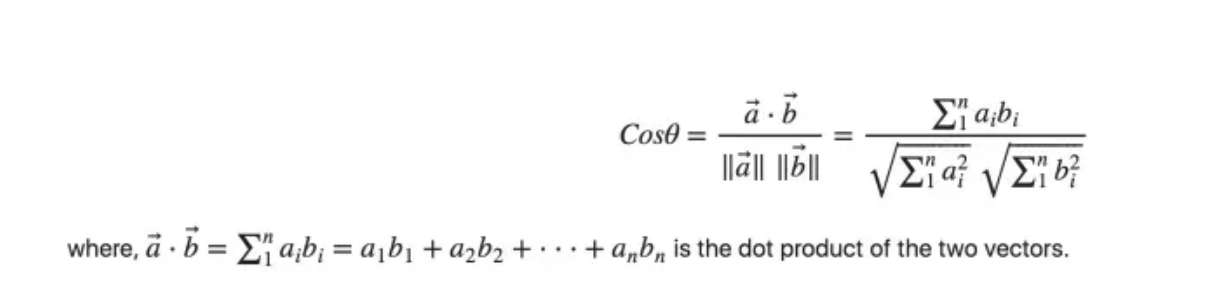

 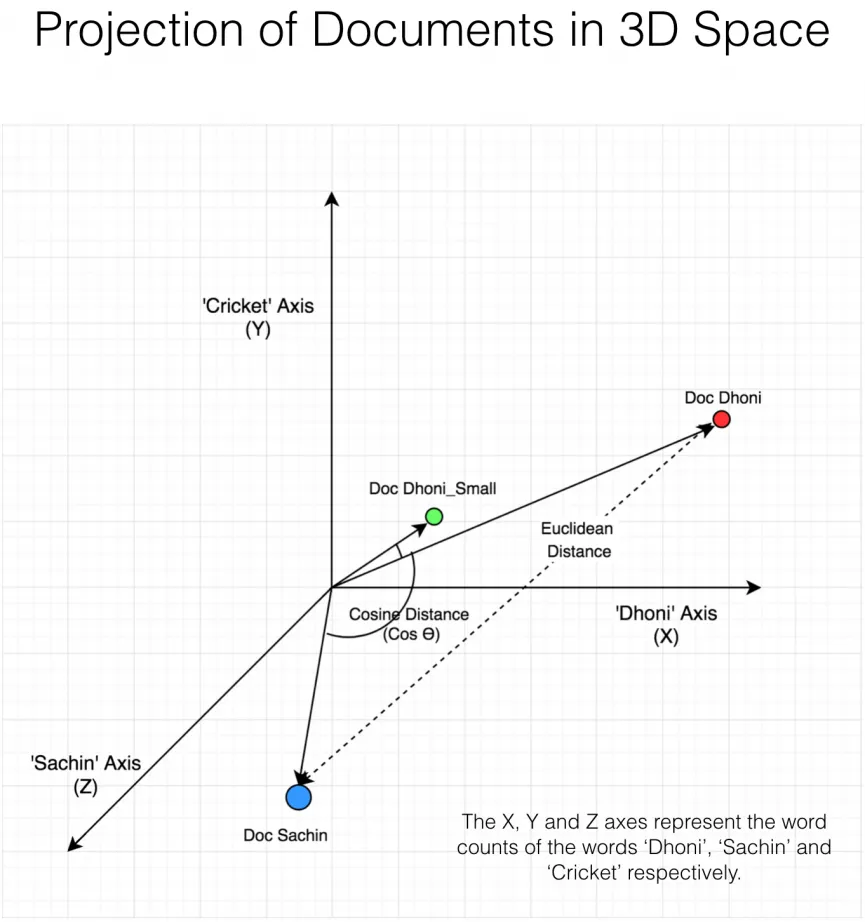

In [ ]:
def locateLargest(matrix):
  similarity_pairs = []
  for row_ind, row in enumerate(matrix):
    for col_ind, num in enumerate(row):
      if num != 1:
        similarity_pairs.append([num, province[row_ind], province[col_ind]])
  res = pd.DataFrame(similarity_pairs).drop_duplicates(subset=[0]).values
  sorted_multi_list = [list(t) for t in sorted(set(tuple(element) for element in res))[::-1]]
  print(sorted_multi_list)  

locateLargest(matrix_sim)

[[0.9999935652, 'ชัยภูมิ', 'สุโขทัย'], [0.9999556486, 'นครปฐม', 'ลำพูน'], [0.9999552672, 'น่าน', 'ยโสธร'], [0.9999479424, 'นครพนม', 'สกลนคร'], [0.9999234523, 'น่าน', 'ร้อยเอ็ด'], [0.9998964666, 'กำแพงเพชร', 'นครสวรรค์'], [0.9997616932, 'ยโสธร', 'ร้อยเอ็ด'], [0.9997558966, 'ร้อยเอ็ด', 'ลำปาง'], [0.9996019475, 'ตรัง', 'เพชรบุรี'], [0.9994059994, 'น่าน', 'ลำปาง'], [0.9993539727, 'นครพนม', 'บึงกาฬ'], [0.9990353308, 'ยโสธร', 'ลำปาง'], [0.9989377949, 'สมุทรสาคร', 'สุพรรณบุรี'], [0.998885253, 'พะเยา', 'มุกดาหาร'], [0.9979373865, 'พะเยา', 'แพร่'], [0.997906697, 'นครนายก', 'ปทุมธานี'], [0.9976760548, 'ปทุมธานี', 'สิงห์บุรี'], [0.9972931209, 'นครปฐม', 'เพชรบุรี'], [0.9972689374, 'ราชบุรี', 'ลำพูน'], [0.9969656384, 'สุโขทัย', 'แพร่'], [0.9969017495, 'นครปฐม', 'ราชบุรี'], [0.9967748624, 'ลำพูน', 'เพชรบุรี'], [0.9966799679, 'ชัยภูมิ', 'แพร่'], [0.9964125706, 'มุกดาหาร', 'แพร่'], [0.9960762497, 'ตรัง', 'นครปฐม'], [0.9960754838, 'ชัยภูมิ', 'ยโสธร'], [0.9960610293, 'น่าน', 'บุรีรัมย์'], [0.9960032614,

## conclusion
Using pandas library, we can analysis the data into many useful things for the further research of Covid-19